# Непараметрическая регрессия  

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv('datasets/auto_insurance_sweden.csv', names=['X', 'Y'])
data = np.array(dataset.X)
target = np.array(dataset.Y)

In [3]:
def dist(x1, x2): 
    return abs(x1 - x2)

In [5]:
def gaussian(u):
    return (1/np.sqrt(2*np.pi))*np.power(np.e, -0.5*(u**2))

In [6]:
def quartic(u):
    return (15/16)*((1-u**2)**2)*(abs(u) <= 1)

In [30]:
def a(x, data, target, h=5, kernel=gaussian):
    first = sum([target[i]*kernel(dist(x, data[i])/h) for i in range(0, len(data))])
    second = sum([kernel(dist(x, data[i])/h) for i in range(0, len(data))])
    return first / second

## Регрессия с гауссовским ядом

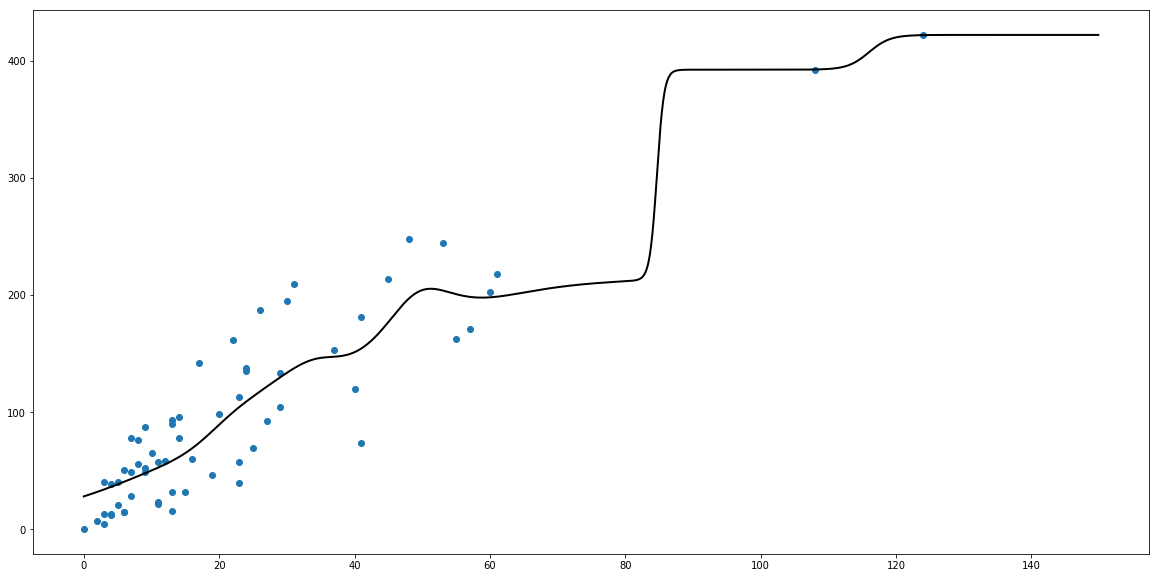

In [37]:
values = [i for i in np.arange(0, 150, 0.1)]
results = [a(values[i], data, target, kernel=gaussian) for i in range(0, len(values))]
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(data, target)
ax.plot(values, results, color='black', linewidth=2)

plt.show()

## Регрессия с квартическим ядром

c:\users\karuk\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


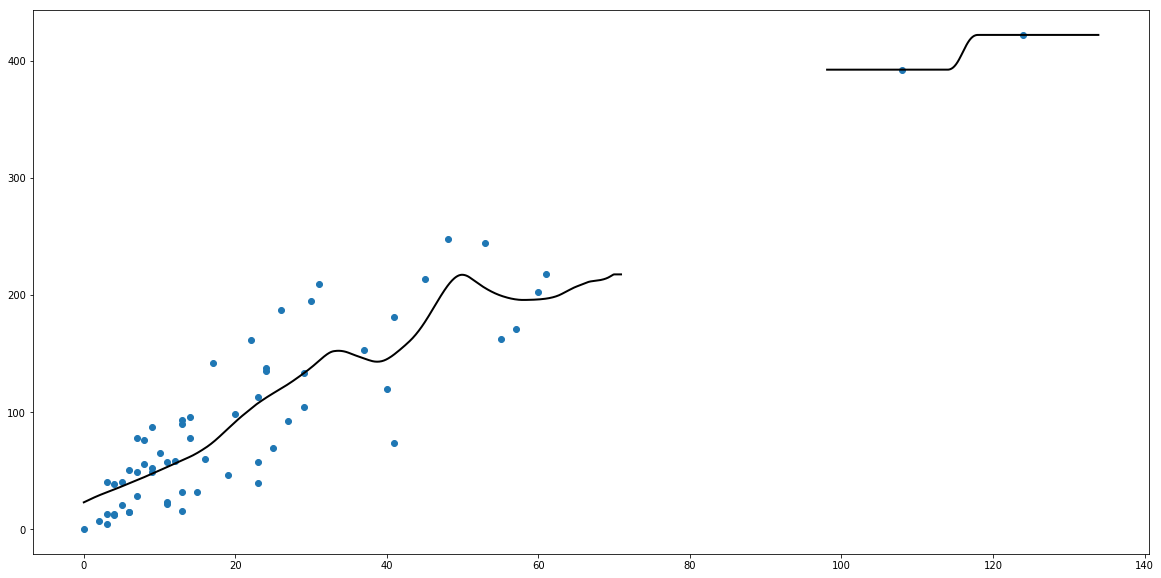

In [41]:
values = [i for i in np.arange(0, 150, 0.1)]
results = [a(values[i], data, target, h = 10, kernel=quartic) for i in range(0, len(values))]
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(data, target)
ax.plot(values, results, color='black', linewidth=2)

plt.show()

# LOWESS